In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import random
import math
import csv

In [11]:
# Import the dataset split into training and testing, etc..
X_tot = datasets.load_digits().data
Y_tot = datasets.load_digits().target
X, X_test, Y, Y_test = train_test_split(X_tot, Y_tot, test_size=0.2)

In [14]:
parameters = {'hidden_layer_sizes': [np.arange(1,200,1),(100,)], 'solver':["lbfgs"], 'activation':["tanh"], 'max_iter':[1000], 'verbose':[True]}

In [15]:
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, iid=True).fit(X,Y)

In [17]:
print(clf.score(X_test,Y_test))
print(clf.best_estimator_)

0.9611111111111111
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)


In [7]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.84      0.84      0.84        32
           2       1.00      0.89      0.94        38
           3       0.93      1.00      0.96        37
           4       0.91      1.00      0.95        30
           5       0.92      0.94      0.93        36
           6       0.95      0.97      0.96        39
           7       0.97      0.91      0.94        33
           8       0.91      0.68      0.78        31
           9       0.84      0.98      0.90        47

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



<StemContainer object of 3 artists>

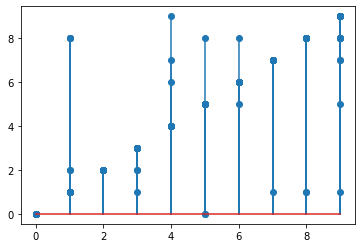

In [9]:
plt.stem(y_pred, Y_test)